# Beginning Set-up

In [2]:
import pandas as pd

folder_path = '../Final Data/final_data.csv'

df = pd.read_csv(folder_path)

In [3]:
print(df)

       departure airport IATA arrival airport IATA delay in mins  \
0            'iataCode': 'atl     'iataCode': 'rsw   'delay': 12   
1            'iataCode': 'atl     'iataCode': 'sat   'delay': 12   
2            'iataCode': 'atl     'iataCode': 'sat   'delay': 12   
3            'iataCode': 'atl     'iataCode': 'sat   'delay': 12   
4            'iataCode': 'atl     'iataCode': 'sat   'delay': 12   
...                       ...                  ...           ...   
732874       'iataCode': 'nrt     'iataCode': 'icn   'delay': 20   
732875       'iataCode': 'nrt     'iataCode': 'ceb   'delay': 28   
732876       'iataCode': 'nrt     'iataCode': 'lax           NaN   
732877       'iataCode': 'nrt     'iataCode': 'cvg           NaN   
732878       'iataCode': 'nrt     'iataCode': 'anc           NaN   

        estimatedDelay            Airline Company month_day  
0                 12.0   'name': 'delta air lines     09-01  
1                 -1.0          'name': 'alitalia     08-31

In [9]:
df['delay in mins'] = pd.to_numeric(df['delay in mins'].replace({"'delay':": ""}, regex=True).astype(float), errors='coerce')
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'].replace("'delay':", ''), errors='coerce')
df['departure airport IATA'] = df['departure airport IATA'].str.replace("'iataCode': '", '').astype(str)
df['arrival airport IATA'] = df['arrival airport IATA'].str.replace("'iataCode': '", '').astype(str)
df['Airline Company'] = df['Airline Company'].str.replace("'name': '", '').astype(str)


In [10]:
print(df)

       departure airport IATA arrival airport IATA  delay in mins  \
0                         atl                  rsw           12.0   
1                         atl                  sat           12.0   
2                         atl                  sat           12.0   
3                         atl                  sat           12.0   
4                         atl                  sat           12.0   
...                       ...                  ...            ...   
732874                    nrt                  icn           20.0   
732875                    nrt                  ceb           28.0   
732876                    nrt                  lax            NaN   
732877                    nrt                  cvg            NaN   
732878                    nrt                  anc            NaN   

        estimatedDelay   Airline Company month_day  
0                 12.0   delta air lines     09-01  
1                 -1.0          alitalia     08-31  
2           

## Clean up the data

In [ ]:
# "delay in mins" has some NA values, so we are taking out the entire row when that is the case

#df = df[df['delay in mins'].notna()]

In [ ]:
print(df)

# Data Visualization

## Exhibit 1 - Does departure delay necessarily mean an arrival delay? 

By limiting our data to historical record of the specific flight that the passenger will take, the plot gives an estimation of arrival delay based on the departure delay. 

Although most routes have departure delay and arrival delay with a positive and 1:1 correlation to each other, some routes do not! The arrival delay is not always positive, which means that even if there is departure delay, sometimes the plane catches up mid air so that it arrives earlier than scheduled time. 

### Exhibit 1.1 - World Wide Data

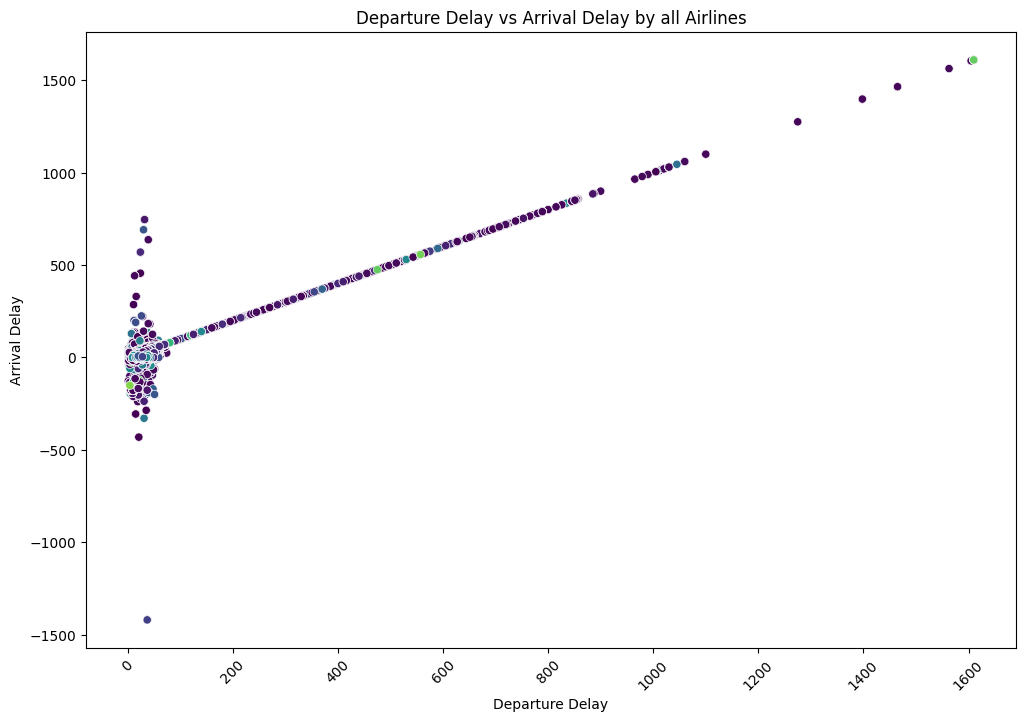

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'delay in mins' and 'estimatedDelay' are numeric columns
df['delay in mins'] = pd.to_numeric(df['delay in mins'], errors='coerce')
df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

x_column = 'delay in mins' 
y_column = 'estimatedDelay' 

# Filter out rows with 'None' values in the specified columns
filtered_df = df.dropna(subset=[x_column, y_column])

# Plot the data without legend
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='viridis')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title(f'Departure Delay vs Arrival Delay by all Airlines')
plt.xticks(rotation=45)

# Remove the legend
plt.legend().set_visible(False)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x_column = 'delay in mins' 
y_column = 'estimatedDelay' 

# Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='viridis')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title(f'Departure Delay vs Arrival Delay by all Airlines')
plt.xticks(rotation=45)

plt.legend().set_visible(False) # We don't need to know all the airport in the data set, since there are so many of them that we can't really keep 
# track anyways

plt.show()


### Exhibit 1.2 - Arrival Airport Specific

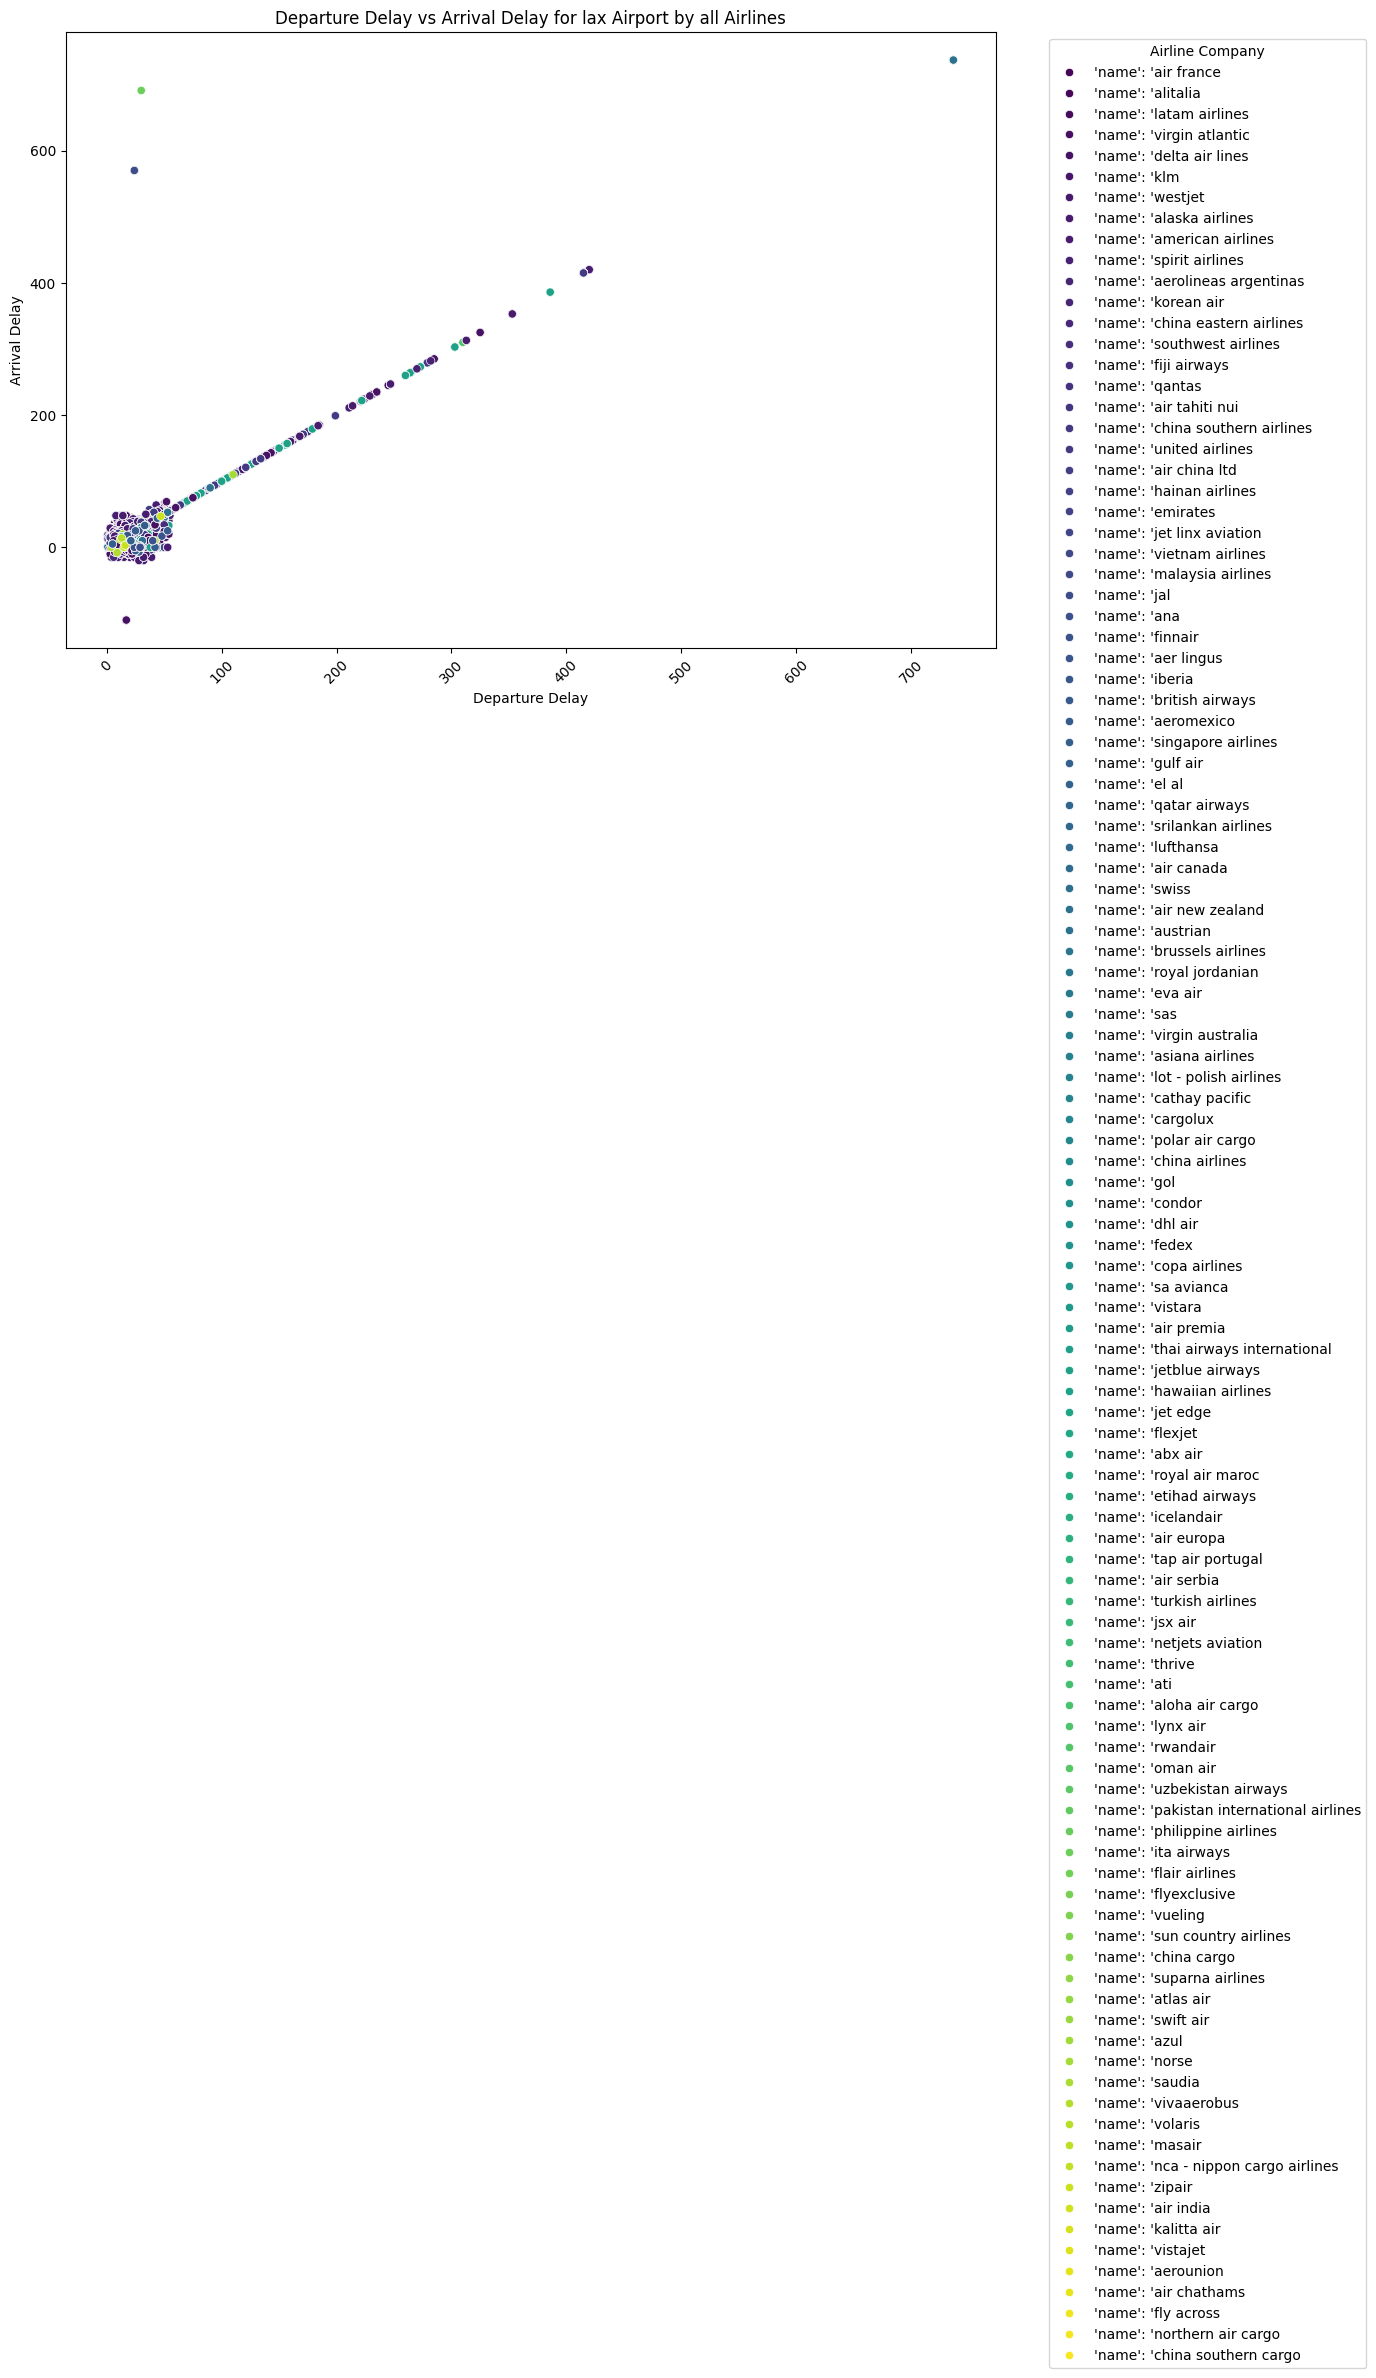

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get user input for the arrival airport
arrival_airport_input = input("Enter arrival airport (e.g., LAX): ")

# Filter the data set using user input
filtered_df = df[df['arrival airport IATA'] == arrival_airport_input]

x_column = 'delay in mins' 
y_column = 'estimatedDelay' 

# Plot the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=filtered_df, palette='viridis')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title(f'Departure Delay vs Arrival Delay for {arrival_airport_input} Airport by all Airlines')
plt.xticks(rotation=45)

plt.legend(title='Airline Company', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Exhibit 1.3 - What about my airline? 

In [ ]:
# User input for the airport
input_airport = input("Enter the airport code (e.g., ATL): ")
x_column = 'delay in mins'
y_column = 'estimatedDelay'

# we set all the flight data points from other airlines to be gray
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_column, y=y_column, hue='Airline Company', data=df, palette='gray')
sns.regplot(x=x_column, y=y_column, data=df, scatter=False, color='black')

# we want the user input airport's data to stand out, so we set them to be red
sns.scatterplot(x=x_column, y=y_column, color='red', data=df[df['departure airport IATA'] == input_airport])

# Set specificities of the plot
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title(f'Scatter Plot of Departure Delay vs Arrival Delay by Airline ({input_airport} in red)')
plt.legend().set_visible(False) # we don't need a legend for all the airline companies since they are all in gray
plt.xticks(rotation=45)

plt.show()


### Exhibit 1.4 - What about my specific flights? 

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, airline, and destination airport
departure_airport = input("Enter departure airport (e.g., ATL): ")
airline = input("Enter airline (e.g., Delta Air Lines): ")
destination_airport = input("Enter destination airport (e.g., RSW): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['Airline Company'] == airline) &
                 (df['arrival airport IATA'] == destination_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Create a scatter plot with trendline using Plotly Express
    fig_delay = px.scatter(filtered_df, x='delay in mins', y='estimatedDelay', title=f'Placeholder Title {airline.upper()} Airline to {destination_airport.upper()}',
                  labels={'delay in mins': 'Departure Delay', 'estimatedDelay': 'Arrival Delay'},
                  hover_name='arrival airport IATA',
                  hover_data={'arrival airport IATA': False, 'delay in mins': True, 'estimatedDelay': '|%B %d, %Y %I:%M %p'},
                  trendline='ols'  # Ordinary Least Squares
                  )

    # Display the plot
    fig_delay.show()


In [ ]:
# need to change label content - a dot with a label, with hover- over, with regression line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, airline, and destination airport
departure_airport = input("Enter departure airport (e.g., ATL): ").lower()
airline = input("Enter airline (e.g., Delta Air Lines): ").lower()
destination_airport = input("Enter destination airport (e.g., RSW): ").lower()

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['Airline Company'] == airline) &
                 (df['arrival airport IATA'] == destination_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    fig_delay = px.scatter(filtered_df, x='delay in mins', y='estimatedDelay', title=f'place holder title {airline.upper()} Airline to {destination_airport.upper()}',
                 labels={'delay in mins': 'departure delay', 'estimatedDelay': 'arrival delay'},
                 hover_name='arrival airport IATA',
                 hover_data={'arrival airport IATA': False, 'delay in mins': True, 'estimatedDelay': '|%B %d, %Y %I:%M %p'},
                 trendline='ols',  # stands for Ordinary Least Squares
                 )
fig_delay.show()


## Exhibit 2 - Which airport has the most severe delays? 

By checking the airport that the passenger is flying out of, the plot shows how does one's destination airport compares to other airports in terms of delays.

In [ ]:

# df['estimatedDelay'] = pd.to_numeric(df['estimatedDelay'], errors='coerce')

# Get user inputs
user_departure_airport = input("Enter the departure airport IATA code: ").strip()

# Filter for flights departing from the specified airport
df_user_departure = df[df['departure airport IATA'].str.contains(user_departure_airport, na=False)]
# Extract the actual airport code from the strings in the 'arrival airport IATA' column

# Create a DataFrame with average estimatedDelay for each arrival airport
average_delay_df = df_user_departure.groupby('arrival airport IATA').agg({'estimatedDelay': 'mean'}).reset_index()


# good final - gives iata, estimated delay, long, lat
merged_df = average_delay_df.merge(airports_df, left_on='arrival airport IATA', right_on='code', how='left')

# Drop the redundant columns
merged_df = merged_df[['arrival airport IATA', 'estimatedDelay', 'longitude', 'latitude']]

In [ ]:
# start plotting the graph and the legend
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Geopanda functions - match our longitude and latitude with the geopanda commands 
globe_df = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['longitude'], merged_df['latitude']))

# Determine the color range and normalization-- this is important because otherwise the values will go from 0 to 100, while we have negative numbers 
vmin = merged_df['estimatedDelay'].min()
vmax = merged_df['estimatedDelay'].max()

# Use viridis because it provides the largest degree of color variation
cmap = 'viridis'

# Plot the data points onto the world map 
fig, ax = plt.subplots(figsize=(12, 6)) 
worldmap.plot(color="lightgrey", ax=ax)

# Plot the points with different colors based on the magnitude of estimatedDelay
scatter = globe_df.plot(ax=ax, markersize=20, alpha=0.7, c=merged_df['estimatedDelay'], cmap=cmap, vmin=vmin, vmax=vmax)

# Add a colorbar, annotate it with the min and max numbers from the table 
cbar = plt.colorbar(scatter.get_children()[0], ax=ax, orientation='vertical', label=f'Delay (Hours) - Min: {vmin}, Max: {vmax}', ticks=[vmin, vmax])

# Creating axis limits and title 
plt.xlim([-180, 180]) 
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Estimated Delay Points on World Map")
plt.show()


# Exhibit 3 - Which airline should you buy a ticket from? 

In [ ]:
# good, do not touch
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport and arrival airport
departure_airport = input("Enter departure airport (e.g., ATL): ")
arrival_airport = input("Enter arrival airport (e.g., RSW): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['arrival airport IATA'] == arrival_airport)]

# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Calculate the average delay for each airline
    average_delay_by_airline = filtered_df.groupby('Airline Company')['estimatedDelay'].mean()

    # Plot the bar chart
    plt.figure(figsize=(12, 8))
    bars = average_delay_by_airline.sort_values().plot(kind='barh', color='skyblue')
    
    # Set plot labels and title
    plt.xlabel('Average Delay (Minutes)')
    plt.ylabel('Airline Company')
    plt.title(f'Average Delay for each Airline from {departure_airport} to {arrival_airport}')

    # Annotate each bar with its value
    for bar in bars.patches:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 ha='left', va='center', color='black')

    # Display the plot
    plt.show()


# Exhibit 4 - When is it going to take off? 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Assuming your dataset is stored in 'sample_final_data.csv'
# df = pd.read_csv('sample_final_data.csv')

# User input for departure airport, arrival airport, and airline
departure_airport = input("Enter departure airport (e.g., ATL): ")
arrival_airport = input("Enter arrival airport (e.g., RSW): ")
# airline = input("Enter airline (e.g., Delta Air Lines): ")

# Filter the dataframe based on user input
filtered_df = df[(df['departure airport IATA'] == departure_airport) &
                 (df['arrival airport IATA'] == arrival_airport) ]
                 #(df['Airline Company'] == airline)

In [ ]:
# Check if there are any matching records
if filtered_df.empty:
    print("No matching records found.")
else:
    # Calculate mean departure delay and standard deviation
    mean_delay = filtered_df['delay in mins'].mean()
    std_dev = filtered_df['delay in mins'].std()

    # Print the mean delay and standard deviation
    print(f"Mean Departure Delay: {mean_delay} minutes")
    print(f"Standard Deviation: {std_dev} minutes")


In [ ]:
# good, don't touch
import scipy.stats as stats

# Probability calculations for being late by 5, 10, and 15 minutes from 0 on the x-axis
probabilities = [1 - stats.norm.cdf(15, loc=0, scale=std_dev),
                 1 - stats.norm.cdf(30, loc=0, scale=std_dev),
                 1 - stats.norm.cdf(60, loc=0, scale=std_dev)]

# Print probabilities
print(f"Probability of plane departing within 15 minutes: {probabilities[0]:.4f}")
print(f"Probability of plane departing within 30 minutes: {probabilities[1]:.4f}")
print(f"Probability of plane departing within 60 minutes: {probabilities[2]:.4f}")

# Create a standard normal distribution plot
plt.figure(figsize=(12, 8))
sns.histplot(filtered_df['delay in mins'], kde=True, stat='density', color='skyblue')
plt.title('Standard Normal Distribution of Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Density')

# Plot vertical lines for mean and 1 standard deviation
plt.axvline(mean_delay, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_delay + std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean + 1 Std Dev')
# plt.axvline(mean_delay - std_dev, color='green', linestyle='dashed', linewidth=2, label='Mean - 1 Std Dev')

# Show legend
plt.legend()

# Display the plot
plt.show()
